In [27]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

Problem Definition 

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

In [28]:
df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING**

This data was obtained from Kaggle and it is a sample of credit card customer’s accounts starting from March 2013 till when the attrition was defined within the next 6 months (April 2016 — October 2013).

In [29]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [30]:
cols = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(df[cols],axis=1,inplace=True)
df.shape


(10127, 21)

In [31]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

The data has 10,127 customers sample and contain features about their demographic profile such as gender, age, education level, etc. and their transactions history.

##Exploratory Data Analysis (EDA)

to understand the bank customers by drawing insights through visualization and identifying the possible reasons for attrition.

In [32]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


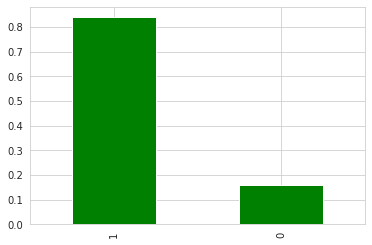

In [33]:
df.Attrition_Flag.value_counts(normalize=True).plot.bar(color='g')
plt.show()

The data is split into 2 classes that identify the customer’s attrition status: Existing Customer, Attrited Customer. Existing Customers represent 83.9% of our sample and the Attrited Customers represent 16.1%, we clearly see that the classes ratio are imbalanced which might make it difficult for the model to identify attrited customers.

In [34]:
df.Customer_Age.describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

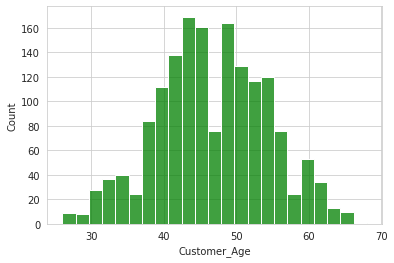

In [35]:
sns.histplot(df[df['Attrition_Flag']==0]['Customer_Age'],color='g') # distribution of age for attrition=0
plt.show()

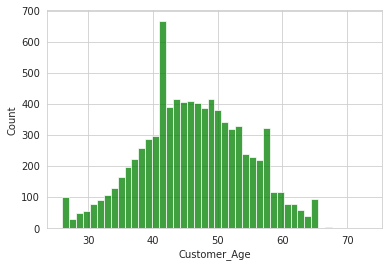

In [36]:
sns.histplot(df[df['Attrition_Flag']==1]['Customer_Age'],color='g') # distribution of age for attrition=1
plt.show()

The highest number of Attrited customers are in the age between 40–54 years, and the lowest numbers are customers in the age between 65–69 years.

The highest number of Existing customers are in the age between 40–54 years, and the lowest numbers are customers in the age between 75–79 years.


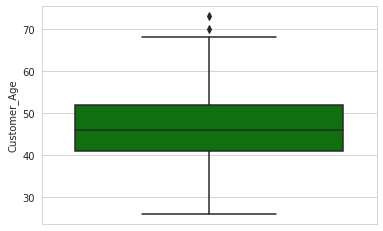

In [37]:
sns.boxplot(data=df,y='Customer_Age',color='g')
plt.show()

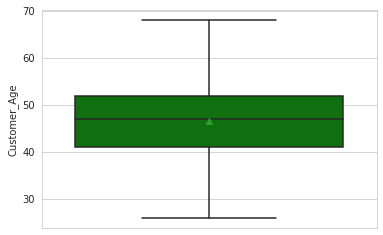

In [38]:
sns.boxplot(y=df[df['Attrition_Flag']==0]['Customer_Age'],color='g',showmeans=True) # distribution of age for attrition=0
plt.show()

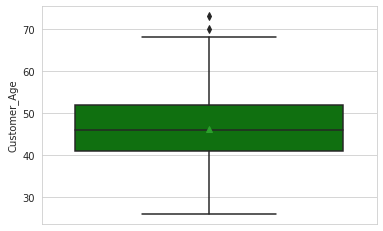

In [39]:
sns.boxplot(y=df[df['Attrition_Flag']==1]['Customer_Age'],color='g',showmeans=True) # distribution of age for attrition=1
plt.show()

The median age of churn is slightly lower 

In [40]:
#gender attribute
df.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

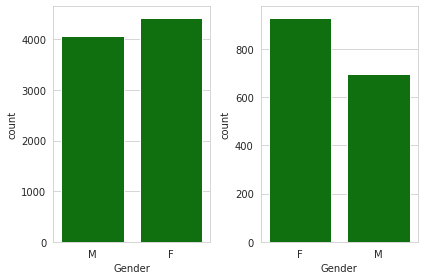

In [41]:
fig,ax = plt.subplots(1,2)
sns.countplot(df[df['Attrition_Flag']==1]['Gender'],color='g',ax=ax[0]) # distribution of gender for attrition=1
sns.countplot(df[df['Attrition_Flag']==0]['Gender'],color='g',ax=ax[1]) # distribution of gender for attrition=1
plt.tight_layout()
plt.show()

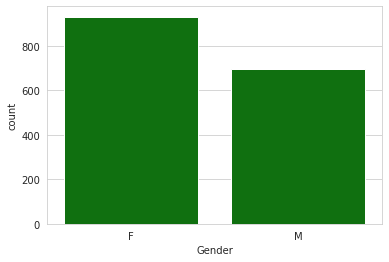

In [42]:
sns.countplot(df[df['Attrition_Flag']==0]['Gender'],color='g') # distribution of gender for attrition=1
plt.show()

The number of Female customers is higher in both Attrited and Existing Customers.

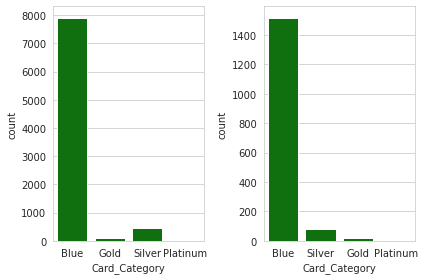

In [43]:
#Credit Card Type
fig,ax = plt.subplots(1,2)
sns.countplot(df[df['Attrition_Flag']==1]['Card_Category'],color='g',ax=ax[0]) # distribution of card type for attrition=1
sns.countplot(df[df['Attrition_Flag']==0]['Card_Category'],color='g',ax=ax[1]) # distribution of card type for attrition=1
plt.tight_layout()
plt.show() 

The highest number of attrited and existing customers are blue cardholders, and the lowest number of attrited and existing customers are platinum cardholders.


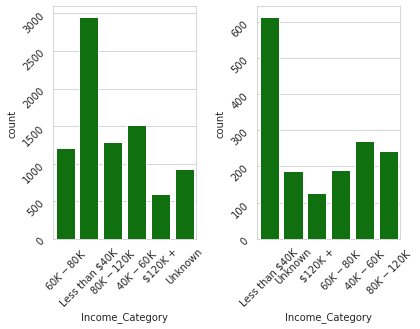

In [44]:
# annual income
#Credit Card Type
fig,ax = plt.subplots(1,2)
sns.countplot(df[df['Attrition_Flag']==1]['Income_Category'],color='g',ax=ax[0]) # distribution of card type for attrition=1
sns.countplot(df[df['Attrition_Flag']==0]['Income_Category'],color='g',ax=ax[1]) # distribution of card type for attrition=1
plt.tight_layout()
ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)
plt.show() 

The highest number of attrited and existing customers have less than 40K dollars as an annual income, and the lowest number of attrited and existing customers have more than 120K dollars as an annual income.

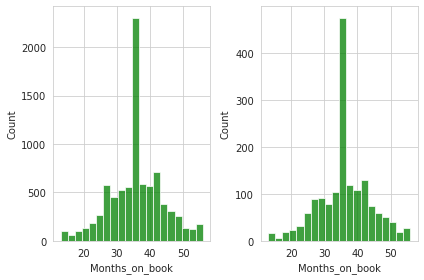

In [45]:
#Period Of Relationship With The Bank
fig,ax=plt.subplots(1,2)
sns.histplot(df[df['Attrition_Flag']==1]['Months_on_book'],color='g',bins=20,ax=ax[0]) # distribution of months on book for attrition=1
sns.histplot(df[df['Attrition_Flag']==0]['Months_on_book'],color='g',bins=20,ax=ax[1]) # distribution of months on book for attrition=0
plt.tight_layout()
plt.show()

In [46]:
df.Months_on_book.describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

The longest period that existing and attrited customers spent with the bank is between 35–39 months, and the shortest period of they spent is between 10–14 months.

In [1]:
#plotting correlation
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

NameError: name 'sns' is not defined

###Preprocessing The Data

In [47]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no missing values in the dataset

In [48]:
#to encode its categorical features into numbers
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [49]:
df = pd.get_dummies(data=df,columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'])#ohe  to cat columns
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,818770008,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,713982108,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [50]:
#split data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('Attrition_Flag',axis=1)
y= df['Attrition_Flag']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8101, 38), (8101,), (2026, 38), (2026,))

n Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes. As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. This problem is prevalent in examples such as Fraud Detection, Anomaly Detection, Facial recognition etc.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [52]:
# addressing class imbalance
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 6801
Before OverSampling, counts of label '0': 1300 

After OverSampling, the shape of train_X: (13602, 38)
After OverSampling, the shape of train_y: (13602,) 

After OverSampling, counts of label '1': 6801
After OverSampling, counts of label '0': 6801


###  BASELINE MODEL BUILDING

we will use 4 chosen models 
- Logistic Regression
- KNN
- RandomForest
- XGBoost

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [67]:
def baseline_model(model,X_train,y_train,X_test,y_test):
  """ the function returns f1score after fitting the model on train and predicting on test data"""
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  f1score = metrics.f1_score(y_test,predictions)
  print('Confusion matrix for baseline model',model)
  metrics.plot_confusion_matrix(model,X_test,y_test)
  plt.show()
  return f1score


Confusion matrix for baseline model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


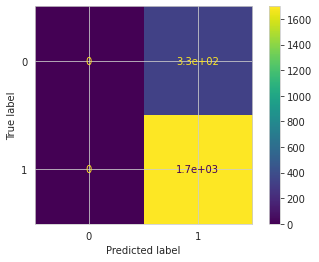

Confusion matrix for baseline model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


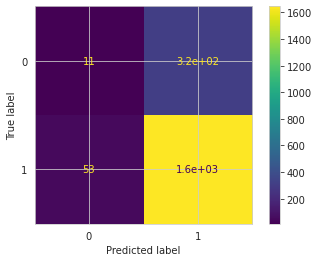

Confusion matrix for baseline model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


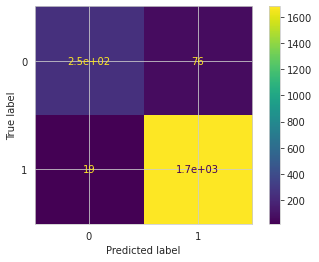

Confusion matrix for baseline model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


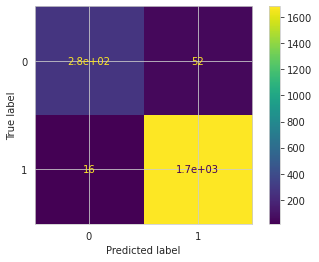

,model_name,base_f1
0,LogisticRegression,0.912215
1,KNN,0.899208
2,RandomForest,0.972504
3,XGBoost,0.980198


In [70]:
models = [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),XGBClassifier()]
model_name = ['LogisticRegression','KNN','RandomForest','XGBoost']
baseline_f1 = []
for model in models:
  f1 = baseline_model(model,X_train,y_train,X_test,y_test)
  baseline_f1.append(f1)
score_df = pd.DataFrame({'model_name':model_name,'base_f1':baseline_f1})
score_df

we will choose XGBoost and use hyperparamter tuning with GridSearchCV

In [75]:
from sklearn.model_selection import RandomizedSearchCV
import time
start = time.time()
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
grid = RandomizedSearchCV(estimator=xgb, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=0 )
grid.fit(X_train,y_train)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)

y_test_grid = grid.best_estimator_.predict(X_test)

end = time.time()
print(end-start)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

 Best score:
0.9863449378451432

 Best parameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.6}
206.3269567489624


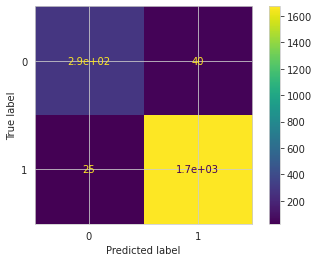

In [77]:
metrics.plot_confusion_matrix(grid.best_estimator_,X_test,y_test)

In [79]:
print(metrics.classification_report(y_test,y_test_grid))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       327
           1       0.98      0.99      0.98      1699

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

